In [36]:
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
import scipy.stats as sp
from mpl_toolkits import mplot3d

### Question 12 :

In [2]:
def pricer_MC(n, s, r, sigma, T, f) :
  Xi = np.random.normal(0, 1, n)
  sum = 0
  for i in range(n) :
    sum += mp.exp(-r*T) * f(s*mp.exp((r-(sigma**2)/2)*T + sigma*mp.sqrt(T)*Xi[i]))
  return (sum/n)

### Question 13 :

In [37]:
def f(x):
  return max(x - 100, 0)

In [4]:
N = [k * (10**5) for k in range(1, 11)]
price_MC = [pricer_MC(n, 100, 0.01, 0.1, 1, f) for n in N]

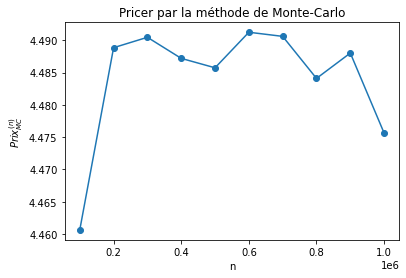

In [5]:
plt.plot(N, price_MC, marker="o")
plt.xlabel("n")
plt.ylabel(r'$Prix_{MC}^{(n)}$')
plt.title("Pricer par la méthode de Monte-Carlo")
plt.show()

### Question 15

In [38]:
def F(x):
  return sp.norm.cdf(x)

In [40]:
def put_BS(s, r, sigma, T, K):
  d1 = 1/(sigma*np.sqrt(T)) * (np.log(s/K) + (r + (sigma**2)/2) * T)
  d2 = d1 - sigma * np.sqrt(T)
  return ((-s) * F(-d1) + K * np.exp(-r*T) * F(-d2))

### Question 16

In [8]:
put_BS(100, 0.01, 0.1, 1, 90)

0.5815000751362422

### Question 17

In [9]:
def f(x):
  return max(90 - x, 0)

In [10]:
N = [k * (10**5) for k in range(1, 11)]
price_MC = [pricer_MC(n, 100, 0.01, 0.1, 1, f) for n in N]

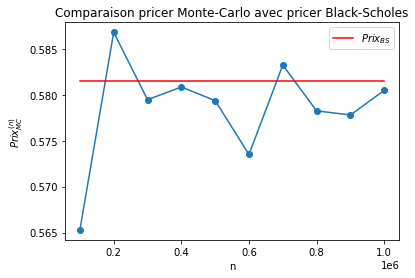

In [11]:
plt.plot(N, price_MC, marker="o")
plt.plot(N, 10*[put_BS(100, 0.01, 0.1, 1, 90)], color="red", label=r'$Prix_{BS}$')
plt.xlabel("n")
plt.ylabel(r'$Prix_{MC}^{(n)}$')
plt.title("Comparaison pricer Monte-Carlo avec pricer Black-Scholes")
plt.legend()
plt.show()

### Question 18

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


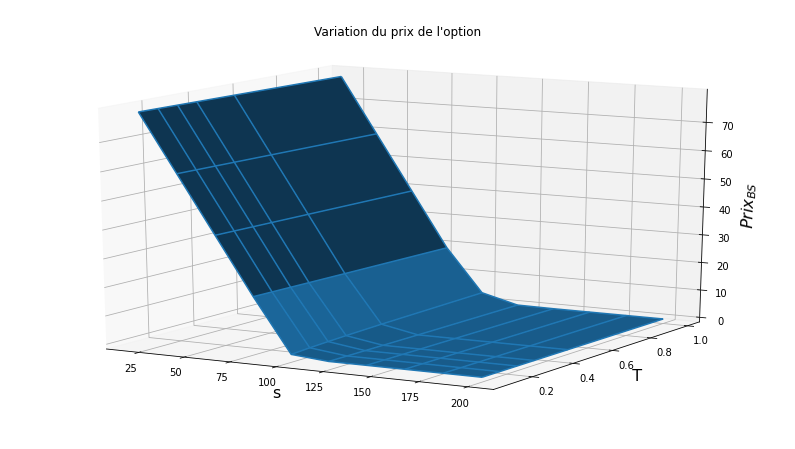

In [12]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Variation du prix de l'option")

ax.set_xlabel('s', fontsize=16)
ax.set_ylabel('  T', fontsize=16)
ax.set_zlabel(r'$Prix_{BS}$', fontsize=16)

ax.view_init(elev=15)

s = [20*k for k in range (1,11)]
t = [1/12, 1/6, 1/4, 1/3, 1/2, 1]
S, T = np.meshgrid(s, t)

p = put_BS(S, 0.01, 0.1, T, 100)

ax.plot_surface(S, T, p)
ax.plot_wireframe(S, T, p)

### Question 19

In [13]:
def f (x) :
  return max(100 - x, 0)

In [14]:
def rN (r, T, n) :
  return (r * T) / n 

In [15]:
def hN (r, sigma, T, n) :
  return ((1 + rN(r, T, n)) * np.exp(sigma * np.sqrt(T/n))) - 1

In [16]:
def bN (r, sigma, T, n) :
  return ((1 + rN(r, T, n)) * np.exp((-1) * sigma * np.sqrt(T/n))) - 1

In [17]:
def qN (rN, hN, bN) :
    return (rN - bN) / (hN - bN)

In [18]:
def pricer_2 (N, rN, hN, bN, s, f) :
  v = []
  for k in range (N + 1) :
    v.append(f(s * ((1 + hN)**k) * (1 + bN)**(N - k)))
  q = qN(rN, hN, bN)
  v0 = (1 - q) / (1 + rN)
  v1 = q / (1 + rN)
  while (len(v) != 1) :
    w = []
    for i in range (len(v) - 1) :
      w.append(v0 * v[i] + v1 * v[i + 1])
    v = w.copy()
  return v[0]

In [19]:
N = [10 * k for k in range(1, 101)]
price_2 = [pricer_2(n, rN(0.03, 1, n), hN(0.03, 0.2, 1, n), bN(0.03, 0.2, 1, n), 100, f) for n in N]

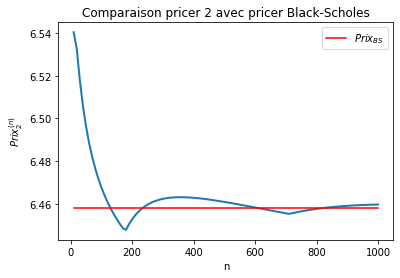

In [20]:
plt.plot(N, price_2, linewidth=2)
plt.plot(N, 100*[put_BS(100, 0.03, 0.2, 1, 100)], color="red", label=r'$Prix_{BS}$')
plt.xlabel("n")
plt.ylabel(r'$Prix_{2}^{(n)}$')
plt.title("Comparaison pricer 2 avec pricer Black-Scholes")
plt.legend()
plt.show()

### Question 20

In [21]:
K = 0.9
r = 0.015
sigma = 0.21
T = 1
xmin = np.log(0.4)
xmax = np.log(2)
N = 100
M = 50 # valeur appréciée qu'on peut modifié

In [22]:
delta = T / M
h = (xmax - xmin) / N
t = [m * delta for m in range(M + 1)]
x = [xmin + j * h for j in range(N - 1)]
alpha = (sigma / np.sqrt(2)) * (delta / h)

In [23]:
def p0 (x) :
  return max(K - np.exp(x), 0)

## Méthode explicite

In [24]:
cj0 = (1 / delta) - r - (sigma**2 / h**2)
cj1 = (sigma**2 / 2 * h**2) - (r / 2*h) + (sigma**2 / 4*h)
cj2 = (r / 2*h) - (sigma**2 / 4*h) + (sigma**2 / 2*h**2)

In [25]:
def pmin (p1, p2) :
  return delta * (cj1 * p1 + cj0 * (K * np.exp(-r*T) - np.exp(xmin)) + cj1 * p2)

In [26]:
def pmax (pn1, pn2) :
  return delta * (cj1 * pn1 + cj0 * pn2)

In [27]:
A = np.zeros((N - 1, N - 1))
for i in range(N - 2):
  A[i,i-1], A[i,i], A[i,i+1] = cj0, cj1, cj2
A[0, N - 2] = 0
A[N - 2, N - 2] = cj1
A[N - 2, N - 3] = cj0
A = delta * A

In [28]:
PI = np.array([p0(xi) for xi in x])
for i in range (1, M - 1) :
  PI[0] = pmin(PI[0], PI[1])
  PI[M - 2] = pmax(PI[M - 2], PI[M - 3])
  PI = A.dot(PI)

## Méthode implicite

In [29]:
cj0 = ((2*r - sigma**2) / 4*h) - (sigma**2 / 2*h**2)
cj1 = 1/delta + r + (sigma**2 / h**2)
cj2 = ((sigma**2 - 2*r) / 4*h) - (sigma**2 / 2*h**2)

In [30]:
C = np.zeros((N - 1, N - 1))
for i in range(N - 2):
  C[i,i-1], C[i,i], C[i,i+1] = cj0, cj1, cj2
C[0, N - 2] = 0
C[N - 2, N - 2] = cj1
C[N - 2, N - 3] = cj0

In [31]:
D = np.identity(N - 1)
D = 1/delta * D

In [32]:
PE = np.array([p0(xi) for xi in x])
E = np.linalg.inv(C).dot(D)
for i in range (1, M - 2) :
  # PE[0] = pmin(PE[0], PE[1])
  # PE[M - 2] = pmax(PE[M - 2], PE[M - 3])
  PE = E.dot(PE)

## Méthode Crank-Nicholson

In [33]:
F = np.linalg.inv(C).dot(D)
G = (1/2) * (F + A)

In [34]:
PCN = np.array([p0(xi) for xi in x])
for i in range (1, M - 2) :
  # PCN[0] = pmin(PCN[0], PCN[1])
  # PCN[M - 2] = pmax(PCN[M - 2], PCN[M - 3])
  PCN = G.dot(PCN)

## Erreur relative

In [41]:
PBS = put_BS(100, 0.015, 0.21, 1, 90)

In [42]:
ERI = abs(PBS - PI)

In [43]:
ERE = abs(PBS - PE)

In [44]:
ERCN = abs(PBS - PCN)

## Graphique

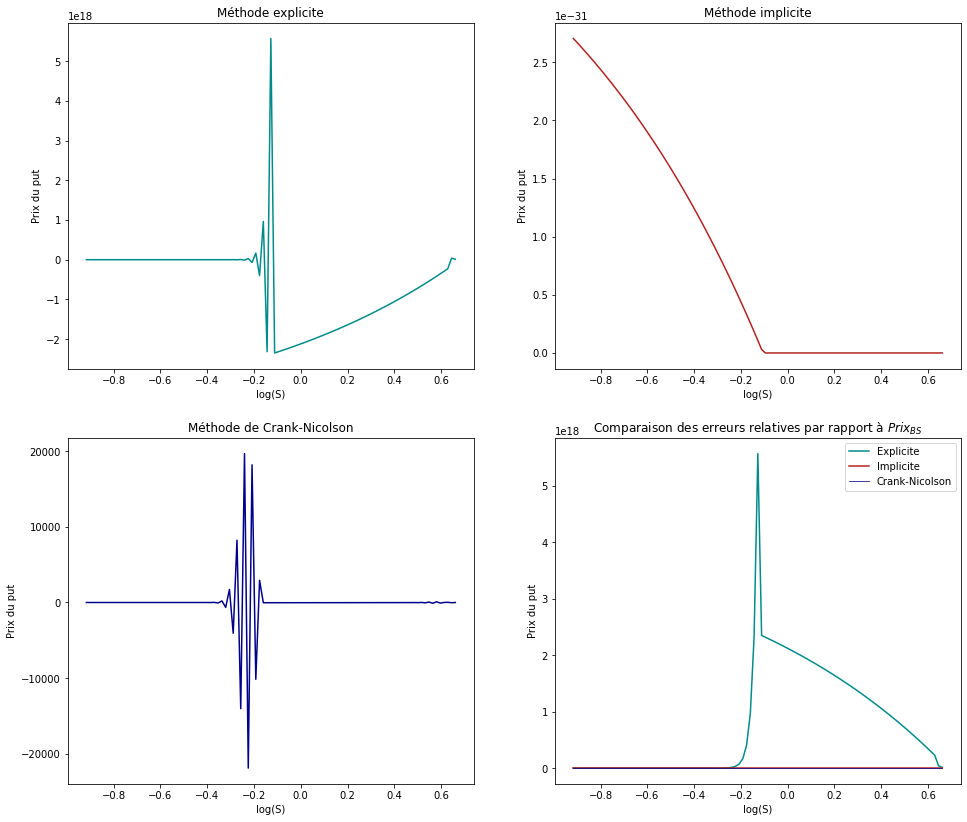

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(16,14))
axs[0,0].set_xlabel("log(S)")
axs[0,1].set_xlabel("log(S)")
axs[1,0].set_xlabel("log(S)")
axs[1,1].set_xlabel("log(S)")
axs[0,0].set_ylabel("Prix du put")
axs[0,1].set_ylabel("Prix du put")
axs[1,0].set_ylabel("Prix du put")
axs[1,1].set_ylabel("Prix du put")
axs[0,0].set_title("Méthode explicite")
axs[0,1].set_title("Méthode implicite")
axs[1,0].set_title("Méthode de Crank-Nicolson")
axs[1,1].set_title("Comparaison des erreurs relatives par rapport à " + r'$Prix_{BS}$')
axs[0,0].plot(x, PI,'darkcyan')
axs[0,1].plot(x, PE,'firebrick')
axs[1,0].plot(x, PCN,'darkblue')
axs[1,1].plot(x, ERI, 'darkcyan',label="Explicite")
axs[1,1].plot(x, ERE,'firebrick',label="Implicite")
axs[1,1].plot(x, ERCN,'darkblue',linewidth=0.75,label="Crank-Nicolson")
axs[1,1].legend(loc="upper right")